HOJA DE TRABAJO 4

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import numpy as np
import random
import pyclustertend 
import plotly.express as px
import seaborn as sb
import sklearn.cluster as cluster
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree
from sklearn import metrics
from sklearn.cluster import KMeans
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

 1. Use los mismos conjuntos de entrenamiento y prueba que usó para los árboles de decisión en la hoja de trabajo anterior.

In [3]:
datos = pd.read_csv("train.csv", encoding='ISO-8859-1')
datos_cluster = datos[["SalePrice","GarageArea","GarageCars","TotRmsAbvGrd","FullBath","GrLivArea","1stFlrSF", "TotalBsmtSF", "YearBuilt", "OverallQual"]].copy()

In [4]:
y = datos_cluster.pop("SalePrice") #La variable respuesta
X = datos_cluster #El resto de los datos

In [5]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

 2. Elabore un modelo de regresión lineal utilizando el conjunto de entrenamiento que hizo para predecir los precios de las casas. Explique los resultados a los que llega. Muestre el modelo gráficamente. El experimento debe ser reproducible por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código.

In [6]:
# %%
p_length = y_train.values.reshape(-1,1)
p_length_t = y_test.values.reshape(-1,1)
p_width = X_train['OverallQual'].values.reshape(-1,1)
p_width_t = X_test['OverallQual'].values.reshape(-1,1)
lm = LinearRegression()
lm.fit(p_width,p_length)
p_length_pred = lm.predict(p_width_t)


In [7]:
#y = mx + c
m = lm.coef_[0][0]
c = lm.intercept_[0]


label = r'$p_length = %0.4f*p_width %+0.4f$'%(m,c)
print(label)

$p_length = 45167.5977*p_width -94512.5714$


Text(0.5, 1.0, 'Test Set Petal length vs Petal width')

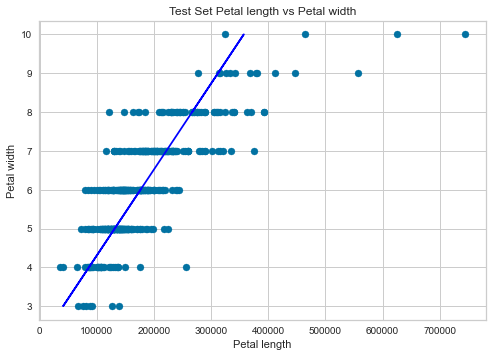

In [8]:
# %%
fig = plt.figure()
plt.scatter(p_length_t,p_width_t)
plt.plot(p_length_pred, p_width_t, color="blue")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Test Set Petal length vs Petal width")

In [9]:
# %%
print("Mean Squared Error: %.2f"%mean_squared_error(p_length_t,p_length_pred))
print("R squared: %.2f"%r2_score(p_length_t,p_length_pred))

Mean Squared Error: 2466623672.87
R squared: 0.61


3.Analice el modelo. Determine si hay multicolinealidad en las variables, y cuáles son las que aportan al modelo, por su valor de significación. Haga un análisis de correlación de las variables del modelo y especifique si el modelo se adapta bien a los datos. Explique si hay sobreajuste (overfitting) o no. En caso de existir sobreajuste, haga otro modelo que lo corrija.

Text(0.5, 1.0, 'Correlacion entre variables')

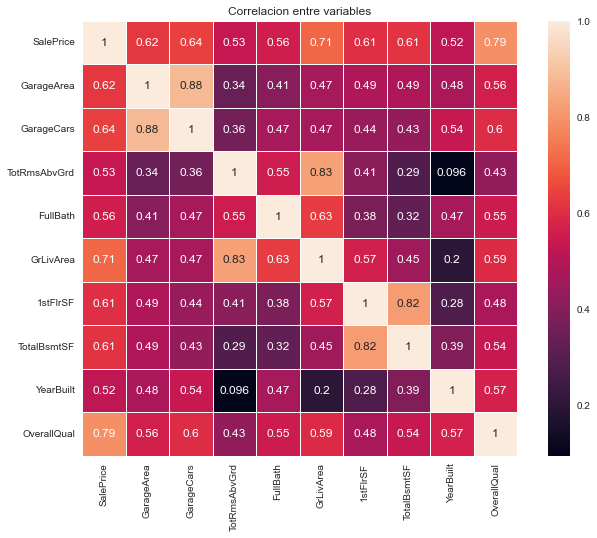

In [27]:
Analisis_Corr = datos[["SalePrice","GarageArea","GarageCars","TotRmsAbvGrd","FullBath","GrLivArea","1stFlrSF", "TotalBsmtSF", "YearBuilt", "OverallQual"]].copy()
correlacion_datos = Analisis_Corr.corr()
f, ax = plt.subplots(figsize=(11, 8))
sb.heatmap(correlacion_datos, vmax=1,square=True, linewidths=.5, annot=True)
plt.title("Correlacion entre variables")

Como se puede observar en el analisis de correlacion, las variables que se encuentran en el modelo son todas las que tienen correlacion mayor a 0.5 con SalesPrice, asi como tambien que esten correlacionadas con mas variables a parte de SalesPrice

4.Determine la calidad del modelo realizando un análisis de los residuos.

In [29]:
# %%
residuales = p_length_t - p_length_pred
len(residuales)
# %%


438

Text(0, 0.5, 'Residuales')

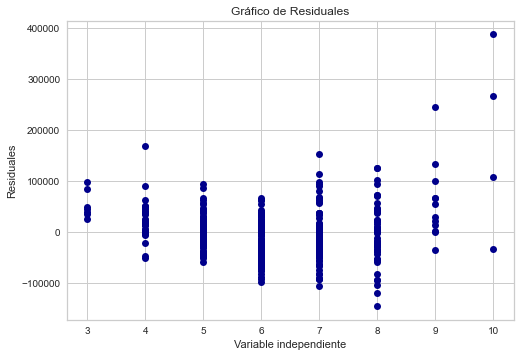

In [30]:
plt.plot(p_width_t,residuales, 'o', color='darkblue')
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")

Segun el el grafico de residuos parece que los valores estan distribuidos alrededor de 0

C:\Users\joopa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuales')

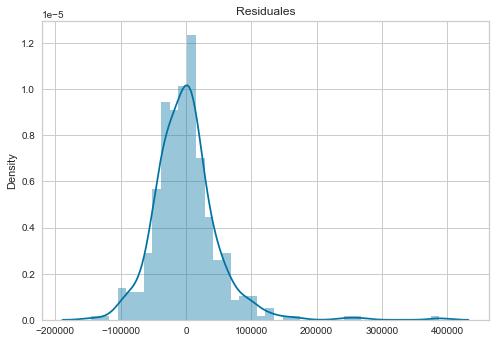

In [28]:
# %%
sb.distplot(residuales);
plt.title("Residuales")

{'whiskers': [<matplotlib.lines.Line2D at 0x26b3e08e910>,
 'caps': [<matplotlib.lines.Line2D at 0x26b3e099070>,
 'boxes': [<matplotlib.lines.Line2D at 0x26b3e08e580>],
 'medians': [<matplotlib.lines.Line2D at 0x26b3e099790>],
 'fliers': [<matplotlib.lines.Line2D at 0x26b3e099b20>],
 'means': []}

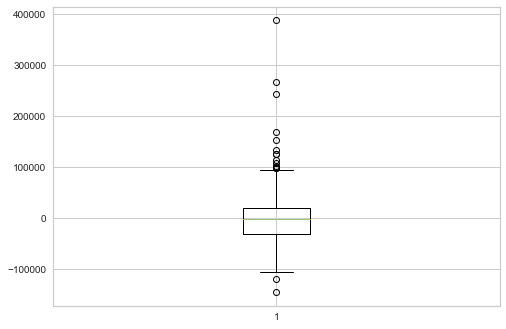

In [12]:
# %%
plt.boxplot(residuales)

In [13]:
# %%
normaltest(residuales)

NormaltestResult(statistic=array([223.12113025]), pvalue=array([3.547008e-49]))

Se puede notar que los residuos siguen una distribucion normal ya que el valor de p es mayor a 0.05 siendo este 3.547008e-49

0.6092709842102817

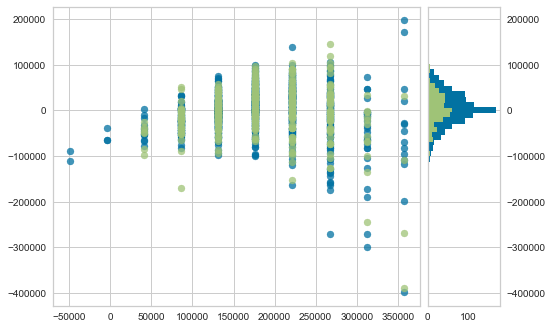

In [14]:
# %%
model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(p_width,p_length)
visualizer.score(p_width_t,p_length_t)

5.Utilice el modelo con el conjunto de prueba y determine la eficiencia del algoritmo para predecir el precio de las casas. 

6.Discuta sobre la efectividad del modelo. Haga los gráficos que crea que le pueden ayudar en la discusión.

7.Compare la eficiencia del algoritmo con el resultado obtenido con el árbol de decisión (el de regresión). ¿Cuál es mejor para predecir? ¿Cuál se demoró más en procesar?